In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
seeds = np.arange(100)
random_state=42

In [3]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [4]:
sel_col = []
with open('..\\Data\\rf_idx_base.txt', 'r') as f:
    for line in f.readlines():
        sel_col.append(line[:-1])

In [5]:
col_names = data.columns
X = data[col_names[3:]]
y = data[col_names[1]]

In [6]:
#X = data[sel_col]

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=random_state)
[X_train, X_valid, y_train, y_valid] = [pd.DataFrame(x) for x in [X_train, X_valid, y_train, y_valid]]

In [8]:
scalex = MinMaxScaler(feature_range=(-1,1))
scalex.fit(X_train)
[X_train_sc, X_valid_sc] = [pd.DataFrame(scalex.transform(x), columns=X.columns) for x in [X_train, X_valid]]

In [9]:
scaley = MinMaxScaler(feature_range=(0, 1))
scaley.fit(y_train)
[y_train_sc, y_valid_sc] = [pd.DataFrame(scaley.transform(y), columns=y.columns) for y in [y_train, y_valid]]

In [10]:
feat_importances_all = []

In [11]:
i = 0
for seed in seeds:
    i += 1
    #print('Seed: {}'.format(seed))
    rng = np.random.default_rng(seed=seed)
    for run in range(100):
        #print('Seed: {}, run: {}'.format(seed, run))
        X_train_sc['random'] = rng.random(size=len(X_train_sc))
        perm = rng.permutation(len(X_train_sc.columns))
        X_perm = X_train_sc[X_train_sc.columns[perm]]
        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, bootstrap=True, random_state=seed)
        rf.fit(X_perm, np.ravel(y_train_sc))
        _, feature_importances_sorted = zip(*sorted(zip(X_perm.columns, rf.feature_importances_), reverse=True))
        feat_importances_all.append(feature_importances_sorted)
    print('{}% done'.format(i*100//len(seeds)))

1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
55% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
71% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
79% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
95% done
96% done
97% done
98% done
99% done
100% done


In [12]:
cls, feature_importances_sorted = zip(*sorted(zip(X_perm.columns, rf.feature_importances_), reverse=True))

In [13]:
fi = pd.DataFrame(feat_importances_all)

In [14]:
fi.columns = cls

In [15]:
avgs = fi.mean(axis=0)
avgs

random    0.002345
rGes      0.000133
piPC05    0.000078
piPC04    0.000082
piPC03    0.000195
            ...   
AMW       0.000455
ALOGP2    0.001067
ALOGP     0.000327
AECC      0.000061
AAC       0.001862
Length: 1261, dtype: float64

In [16]:
s = avgs.sort_values(ascending=False)

In [17]:
fi.describe()

,random,rGes,piPC05,piPC04,piPC03,nTriazoles,nTA,nROR,nROH,nRNR2,...,ATS4e,ATS3v,ATS3s,ATS2s,ARR,AMW,ALOGP2,ALOGP,AECC,AAC
count,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,...,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,2.345495e-03,1.331737e-04,7.835201e-05,0.000082,1.951847e-04,0.000006,4.058552e-05,0.000005,5.545202e-05,0.000008,...,2.178959e-04,7.423198e-05,0.000161,0.000590,7.026055e-05,4.548616e-04,0.001067,3.273938e-04,6.097212e-05,1.862257e-03
std,4.641221e-03,3.189626e-04,1.755139e-04,0.000184,7.958418e-04,0.000041,1.213346e-04,0.000053,1.900270e-04,0.000068,...,6.137649e-04,1.993659e-04,0.000327,0.000667,2.876253e-04,1.398417e-03,0.001138,5.161061e-04,1.466152e-04,1.861414e-03
min,-1.979543e-18,-2.136176e-18,-1.301929e-18,0.000000,-2.012474e-18,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,-2.416464e-18,0.000000e+00,0.000000,0.000000,-4.024948e-18,-1.804648e-18,0.000000,-1.424794e-18,-1.957972e-18,-1.150154e-18
25%,2.356413e-04,5.198445e-07,7.885986e-07,0.000001,1.572821e-06,0.000000,2.805104e-07,0.000000,2.014888e-08,0.000000,...,6.756475e-07,9.397728e-07,0.000006,0.000027,1.254722e-18,2.568923e-06,0.000155,1.437853e-05,4.224631e-07,8.322086e-05
50%,9.540084e-04,9.945290e-06,1.076356e-05,0.000013,1.431531e-05,0.000000,3.818840e-06,0.000000,1.896474e-06,0.000000,...,9.974351e-06,1.151796e-05,0.000030,0.000414,2.677082e-06,3.103681e-05,0.000681,1.084589e-04,6.078458e-06,1.518133e-03
75%,2.651815e-03,9.557597e-05,6.695194e-05,0.000071,7.007945e-05,0.000000,2.510572e-05,0.000000,1.835580e-05,0.000000,...,6.212147e-05,5.497103e-05,0.000159,0.000932,2.424158e-05,1.764243e-04,0.001601,4.354382e-04,4.263169e-05,2.977880e-03
max,1.509510e-01,3.765494e-03,2.315977e-03,0.003184,6.198374e-03,0.000758,1.959258e-03,0.001985,3.023455e-03,0.002302,...,5.226272e-03,3.652726e-03,0.003127,0.005520,3.274003e-03,1.152645e-02,0.006377,3.898844e-03,1.929368e-03,9.389952e-03


In [18]:
s

P_VSA_MR_5       9.148036e-02
LUMO / eV        6.540236e-02
Mor04m           6.307581e-02
Mor22s           2.675425e-02
E1p              2.603804e-02
                     ...     
CATS3D_07_DN     9.169103e-07
CATS3D_05_DP     8.868567e-07
Eig14_EA(dm)     8.434689e-07
Eig14_AEA(ed)    8.299569e-07
DLS_06           6.219354e-07
Length: 1261, dtype: float64

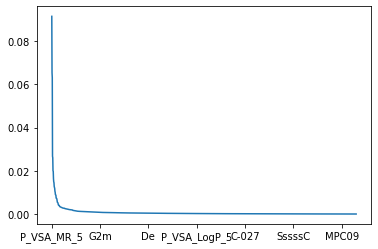

In [19]:
fig, ax = plt.subplots()
s.plot(ax=ax)
plt.show()

In [20]:
s[:30]*100

P_VSA_MR_5      9.148036
LUMO / eV       6.540236
Mor04m          6.307581
Mor22s          2.675425
E1p             2.603804
P_VSA_LogP_2    2.001278
HOMO / eV       1.972009
Mor14u          1.631402
Mor29v          1.490213
MATS5v          1.451979
GATS5v          1.277551
Mor14s          1.227546
Mor32m          1.184971
CATS3D_02_AP    1.054212
TDB04s          1.005167
MATS5m          0.897020
R5p+            0.882497
E2s             0.871430
H3m             0.734844
R2e+            0.725861
GATS2s          0.720195
Mor04i          0.691716
R5i+            0.605818
ISH             0.543108
E2m             0.533601
TDB03m          0.522745
Mor19m          0.491899
VE2sign_G       0.427636
E2v             0.412174
Mor11u          0.409955
dtype: float64

In [21]:
s.index[:63]

Index(['P_VSA_MR_5', 'LUMO / eV', 'Mor04m', 'Mor22s', 'E1p', 'P_VSA_LogP_2',
       'HOMO / eV', 'Mor14u', 'Mor29v', 'MATS5v', 'GATS5v', 'Mor14s', 'Mor32m',
       'CATS3D_02_AP', 'TDB04s', 'MATS5m', 'R5p+', 'E2s', 'H3m', 'R2e+',
       'GATS2s', 'Mor04i', 'R5i+', 'ISH', 'E2m', 'TDB03m', 'Mor19m',
       'VE2sign_G', 'E2v', 'Mor11u', 'SpMAD_RG', 'Mor28s', 'R5e+',
       'Eta_epsi_5', 'DISPm', 'H0v', 'R2u+', 'MATS8p', 'Ds', 'Mor03s',
       'T(N..O)', 'E1i', 'GATS5m', 'Mor29e', 'VE1sign_G', 'X3Av', 'Hy',
       'MATS4s', 'E3e', 'Mor15s', 'X4Av', 'GATS4s', 'P_VSA_e_3', 'Mor15i',
       'R3s+', 'TDB03e', 'Mor30p', 'Mor32s', 'E2e', 'MATS3m', 'random', 'E3v',
       'TDB01m'],
      dtype='object')

In [22]:
fi.to_pickle('..\\Data\\rf_with_rnd.pkl')

In [23]:
with open('..\\Data\\rf_idx_with_rnd.txt', 'w') as f:
    for item in s.index[:63]:
        f.write("%s\n" % item)

In [24]:
#list_s = s.index.tolist()
#for i in range(63):
#    j = list_s.index(sel_col[i])
#    print(sel_col[i], i, j, i-j)

In [25]:
#fi.std(axis=0).sort_values(ascending=True)

In [26]:
#f2 = fi.reindex(fi.mean().sort_values(ascending=False).index, axis=1)

In [27]:
#fig, ax = plt.subplots(figsize=(18,5))
#f2.boxplot(ax=ax)
#plt.ylabel('Feature importance')
#plt.xticks(rotation=90)
#plt.show()

In [28]:
#positions = [[i, sel_col.index(f2.columns[i])] for i in range(len(sel_col))]

In [29]:
#positions = np.array(positions)

In [30]:
#positions[:,1] -= positions[:,0]

In [31]:
#fig, ax = plt.subplots(figsize=(18,3))
#ax.plot([0, 62], [0,0])
#ax.plot(diffs[:,1], 'x')
#plt.xticks(range(63), f2.columns.tolist(), rotation=90)
#plt.ylabel('Difference in position')
#plt.show()

In [32]:
#df = pd.read_pickle('..\\Data\\rf_base.pkl')

In [33]:
#df.mean().sort_values()

In [34]:
k = fi.std(axis=0).sort_values()

CATS3D_07_DN     0.000008
CATS3D_05_DP     0.000009
CATS2D_07_DA     0.000014
DLS_06           0.000015
Eig14_AEA(ed)    0.000018
                   ...   
Mor14u           0.009201
Mor22s           0.011031
Mor04m           0.015080
P_VSA_MR_5       0.018010
LUMO / eV        0.019600
Length: 1261, dtype: float64